<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [2]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [13]:
yelp['text'].head()

0    BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...
1    Came here for lunch Togo. Service was quick. S...
2    I've been to Vegas dozens of times and had nev...
3    We went here on a night where they closed off ...
4    3.5 to 4 stars\n\nNot bad for the price, $12.9...
Name: text, dtype: object

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [3]:
import spacy
from spacy.tokenizer import Tokenizer

nlp=spacy.load("en_core_web_md")

In [9]:
def tokenize(doc):
    tokenizer = Tokenizer(nlp.vocab)
    tokens = tokenizer(doc)
    print(type(tokens))
    return list(tokens)

In [16]:
tokenize('qaD HIjmeH jIHvaD pong "Lambda DuSaQ!" chargh jIH')

<class 'spacy.tokens.doc.Doc'>


[qaD, HIjmeH, jIHvaD, pong, ", Lambda, DuSaQ, !, ", chargh, jIH]

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = yelp['text']
STOP_WORDS = nlp.Defaults.stop_words

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words=STOP_WORDS, max_features=5000)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data)

# View Feature Matrix as DataFrame
docs = pd.DataFrame(dtm.todense(), columns = tfidf.get_feature_names())
docs.head()

,00,000,00pm,07,10,100,1000,101,10pm,11,...,yuck,yuk,yum,yummy,yup,zero,zone,zoo,zucchini,était
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

# Fit on TF-IDF Vectors
nn.fit(dtm.todense())

sample_review = [""""TOO AWESOME. MULTIGRAIN SUBWAYS ARE AWESOME AND GOOD FOR HEALTH. 
I am on diet. I always prefer Subway as healthy diet. 
Salad are also very good. It contains lots of vegetables which is very good for health"""]

new = tfidf.transform(sample_review)

matches = nn.kneighbors(new.todense())

In [15]:
pd.options.display.max_colwidth = 1000
for match in matches[1]:
    print(yelp.loc[match]['text'])

6311                                                                                                                                                                                                                                                                                                                                                   天氣很熱吃不下東西，今天我點了一個韓國冷面湯、餐後點了甜點，冰沙系列不會太甜膩，覺得店家很用心製作，包含擺盤精緻、佐料衛生，夏日想開胃，這是一個不錯的選擇，服務人員也很敬業，以後會常常來
6204                                                                                                                                                                                                                      旅行でラスベガスに来ましたがネイルがはげてるのが気になり、探したお店でした。\n質問にも丁寧に答えてくれましたし、日本人の方も日本語が話せる方も居て、とても綺麗で居心地のいいお店でした。 \nネイルはちはるさんと言う綺麗な方が丁寧にしてくれとても気に入りました。\n予定になかったまつ毛エクステもお願いし、日本ではまだあまりないブラウンカラーのエクステをしてもらい、とても気に入りました。\nまた是非マッサージなどで伺いたいと思います。
3791    Amazing people! Very knowledgeable about products/medications, caring and dedicated to your health. Really appreciate 

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [17]:
# Import Statements
from sklearn.pipeline import Pipeline

from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Create Pipeline

vect = TfidfVectorizer(stop_words='english')
sgdc = SGDClassifier()

pipe = Pipeline([('vect', vect), ('clf', sgdc)])

In [18]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

X = yelp['text']
y = yelp['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,
                                                   stratify=y)

pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [19]:
print(pipe.predict(sample_review))

[5]


In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(pipe.predict(X_test), y_test)

0.6069696969696969

In [21]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'clf__max_iter':(20, 10, 100)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   23.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vect__max_df': (0.5, 0.75, 1.0), 'clf__max_iter': (20, 10, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [22]:
accuracy_score(grid_search.best_estimator_.predict(X_test), y_test)

0.6093939393939394

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [23]:
import numpy as np
import gensim
import os
import re

from gensim.utils import smart_open, simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

yelp['tokens'] = yelp['text'].apply(tokenize)

# A Dictionary Representation of all the words in our corpus
id2word = corpora.Dictionary(yelp['tokens'])
corpus = [id2word.doc2bow(text) for text in yelp['tokens']]

In [24]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 20,
                   passes=10,
                   workers=4
                  )

In [25]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
#         stream = doc_stream(path)
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [26]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=yelp['tokens'], 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6)

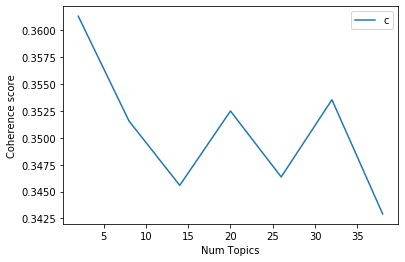

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [28]:
coherence_values

[0.3613039169734922,
 0.3515637070778589,
 0.34558003334212783,
 0.35249242736011366,
 0.3463612584483983,
 0.3535415586898699,
 0.34292490297260064]

In [29]:
# Looks like 26 is the sweet spot, though they're all pretty similar...

lda = model_list[4]

In [30]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(lda, corpus, id2word)

ModuleNotFoundError: No module named 'pyLDAvis'

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)